# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		  1
 4 		  1
[0, 1]


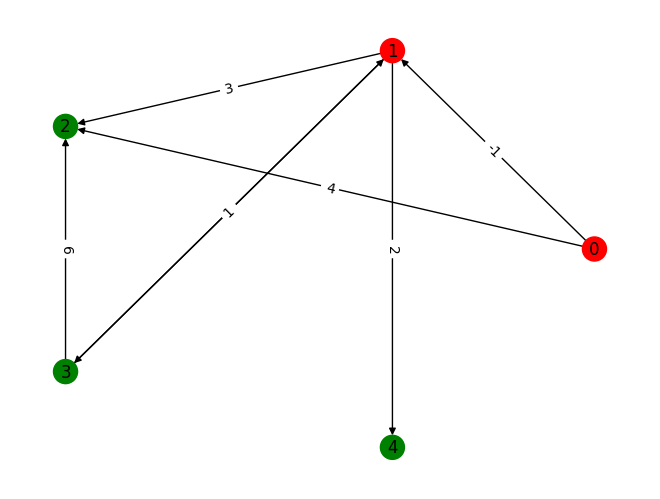

In [9]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import timeit
a=[]

class Graph:
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []  
    
    # Функция добавления ребра в список смежности
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
    
    # Функция для вывода расстояний от источника до каждой вершины
    def printArr(self, dist):
        print("Расстояние вершины от источника")
        for i in range(self.V):
            print("% d \t\t % d" % (i, dist[i]))
    
    # Алгоритм Беллмана-Форда для поиска кратчайших путей от источника до всех остальных вершин в графе.
    def BellmanFord(self, src):
        k=99 # Хранение предыдущей вершины
        global a # Объявление глобальной переменной для хранения предыдущих вершин на кратчайшем пути
        dist = [10000.0] * self.V # Инициализация массива расстояний до всех вершин, устанавливаем бесконечность для всех вершин кроме источника
        dist[src] = 0 # Расстояние от источника до самого себя равно 0
 
        for i in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != 10000.0 and dist[u] + w < dist[v]: # Если расстояние до вершины v можно уменьшить, то обновляем расстояние до неё
                    dist[v] = dist[u] + w
                    if u!=k: # Если это не первая вершина на пути к v, то добавляем предыдущую вершину u в список a
                        a.append(u)
                        k=u
        
        # Проверяем наличие отрицательных циклов в графе
        for u, v, w in self.graph:
            if dist[u] != 10000.0 and dist[u] + w < dist[v]:
                print("Негативный цикл внутри графа")
                return
        
        # Выводим расстояния от источника до каждой вершины
        self.printArr(dist)
 
n=int(input("Количество вершин:"))
m=int(input("Количество ребер: "))

g = Graph(n)
G = nx.DiGraph()

for i in range(m):
    u,v,w = tuple(map(int,input(str(i)+"-е ребро: ").split(" ")))
    g.addEdge(u,v,w)
    G.add_edge(u,v, weight = w)
    
g.BellmanFord(0)
print(a)
color_map = []
for node in G:
    result = node in a
    if result == True:
        color_map.append('red')
    else:
        color_map.append('green')

pos=nx.circular_layout(G)
nx.draw(G, pos, node_color=color_map, with_labels=True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

к-во вершин=5
к-во ребер=8
0-е ребро: 0 1 -1
1-е ребро: 0 2 4
2-е ребро: 1 2 3
3-е ребро: 1 3 2
4-е ребро: 1 4 2
5-е ребро: 3 2 5
6-е ребро: 3 1 1
7-е ребро: 4 3 -3

### Вывод